import libraries

In [1]:
from fastai.vision import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')



Grab Dataset

In [2]:
mnist_path = untar_data(URLs.MNIST)

In [3]:
# re-visit
Path.BASE_PATH = mnist_path

In [4]:
mnist_path.ls()

(#2) [Path('training'),Path('testing')]

In [5]:
(mnist_path/'training').ls()

(#10) [Path('training/4'),Path('training/7'),Path('training/9'),Path('training/5'),Path('training/8'),Path('training/0'),Path('training/2'),Path('training/1'),Path('training/6'),Path('training/3')]

Assign Sets from path

In [13]:
nines = (mnist_path/'training'/'9').ls().sorted()
sixes = (mnist_path/'training'/'6').ls().sorted()

In [15]:
nines

(#5949) [Path('training/9/10003.png'),Path('training/9/10004.png'),Path('training/9/10023.png'),Path('training/9/10028.png'),Path('training/9/10038.png'),Path('training/9/10043.png'),Path('training/9/10047.png'),Path('training/9/1005.png'),Path('training/9/10055.png'),Path('training/9/10059.png')...]

Create Tensors from each image in path

In [30]:
im_9 = Image.open(nines[1])
im_9

In [31]:
im_9_tens = tensor(im_9)
im_9_tens[4:15, 4:15]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,  33,  54, 151, 151, 194, 151, 151],
        [  0,   0,   0,  64, 237, 254, 254, 254, 254, 254, 254],
        [  0,   0,  12, 187, 255, 173, 114,  69,  10,  10,  10],
        [  0,  12, 182, 246,  99,   8,   0,   0,   0,   0,   0],
        [  0, 132, 254, 218,   0,   0,   0,   0,   0,   0,   0],
        [  0, 141, 254, 125,   0,   0,   0,   0,   0,   0,   0],
        [  0, 134, 254, 239, 151,  29,  12,   0,   0,   0,   0],
        [  0,  13, 185, 254, 254, 254, 233, 125, 167, 167, 167]], dtype=torch.uint8)

In [40]:
nines_tens = [tensor(Image.open(o)) for o in nines]
sixes_tens = [tensor(Image.open(o)) for o in sixes]

AttributeError: 'list' object has no attribute 'shape'

Stack the list of tensors

In [42]:
stacked_nines = torch.stack(nines_tens).float()/255
stacked_sixes = torch.stack(sixes_tens).float()/255
stacked_nines.shape, stacked_sixes.shape

(torch.Size([5949, 28, 28]), torch.Size([5918, 28, 28]))

Get the average of the stacks and assign

(<AxesSubplot: >, <AxesSubplot: >)

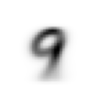

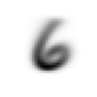

In [53]:
mean_stacked_nines = stacked_nines.mean(0)
mean_stacked_sixes = stacked_sixes.mean(0)
show_image(mean_stacked_nines), show_image(mean_stacked_sixes)

Assign arbitrary actual image

(<AxesSubplot: >, <AxesSubplot: >)

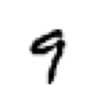

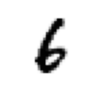

In [55]:
im_9 = stacked_nines[2]
im_6 = stacked_sixes[2]
show_image(im_9), show_image(im_6)

Assign to calculate distance from example to ideal
1. The mean absolute distance(L1 Norm)
1. The squareroot of the mean of the square of differences(root mean squared error, or L2 Norm)

In [67]:
dist_nines_abs = (im_9 - mean_stacked_nines).abs().mean()
dist_sixes_abs = (im_9 - mean_stacked_sixes).abs().mean()
dist_nines_mse = ((im_9 - mean_stacked_nines)**2).mean().sqrt()
dist_sixes_mse = ((im_9 - mean_stacked_sixes)**2).mean().sqrt()


(tensor(0.0990), tensor(0.1462))

In [70]:
dist_nines_abs, dist_nines_mse

(tensor(0.0990), tensor(0.1961))

In [71]:
dist_sixes_abs, dist_sixes_mse

(tensor(0.1462), tensor(0.2703))

Do the same as above with the pytorch library

Fastai automatically imports `torch.nn.functional` as `F`

In [76]:
dist_nines_abs = F.l1_loss(im_9.float(), mean_stacked_nines)
dist_nines_mse = F.mse_loss(im_9, mean_stacked_nines).sqrt()
dist_nines_abs, dist_nines_mse

(tensor(0.0990), tensor(0.1961))

In [80]:
dist_sixes_abs = F.l1_loss(im_9.float(), mean_stacked_sixes)
dist_sixes_mse = F.mse_loss(im_9, mean_stacked_sixes).sqrt()
dist_sixes_abs, dist_sixes_mse


(tensor(0.1462), tensor(0.2703))

*** 

Create tensors for the validation set of each

In [81]:
mnist_path.ls()

(#2) [Path('training'),Path('testing')]

In [90]:
valid_nines_tens = torch.stack([tensor(Image.open(o))
                                for o in (mnist_path/'testing'/'9').ls()])
valid_sixes_tens = torch.stack([tensor(Image.open(o))
                                for o in (mnist_path/'testing'/'6').ls()])
valid_nines_tens = valid_nines_tens.float()/255
valid_sixes_tens = valid_sixes_tens.float()/255
valid_nines_tens.shape, valid_sixes_tens.shape                                

(torch.Size([1009, 28, 28]), torch.Size([958, 28, 28]))

Define a function that returns mean absolute distance(L1 Norm)(-1,-2)

Pass sample image and mean image to function

Define a function that returns a boolean `True` value if a sample image is a 3

Assign the return value of the above as the mean of a float to calculate accuracy of 3's and 7's

*** 

Create a simple quadratic function definition

Plot the function

Scatter Plot the function

*** 

Create a scalar tensor `xt` (float) and "tag" that we want to calculate gradients with respect to that variable

Calucate our function `yt` at funtion `xt`

Tell pytorch to calculate the gradients of `yt` for us

View the gradients that were calculated

*** 

Repeat the above using the same name(`xt`), but create a vector

Add a `sum` to the above function, so that it can take a vector and return a scalar

Repeat backpropagation

*** 

*Imagine you were measuring the speed of a roller coaster as it went over the top of a hump. It would start fast, and then get slower as it went up the hill; it would be slowest at the top, and it would then speed up again as it went downhill. You want to build a model of how the speed changes over time*

Create a vector tensor `time` as 20 float values

Create at vector tensor `speed` at 20 float values that would show a random quadratic distribution of points

Plot result

Define a quadratic function(`f`) that takes 2 arguments
- one for time
- one for parameters

In this function separate the input and the parameters in the return value

Define a function that calculates the means square error on predictions and targets

#### Step 1: Initialize the parameters

Also clone original params for graphs later

#### Step 2: Calculate the predictions

#### Step 3: Calculate the loss

#### Step 4: Calculate the gradients

Pick a learning rate

#### Step 5: Step the weights. 

Update parameters based on calculated gradients

Check if loss has improved

Create a function so that all the above can be applied several times

#### Step 6: Repeat the process 

Iterate to repeat the process

#### Step 7: stop

*** 

Create a graphvis of the gradient descent process

*** 